 # Other Teams with similar Problem Statement


Automated Music Playlist Generator: pankil18061@iiitd.ac.in	arka18222@iiitd.ac.in daksh18137@iiitd.ac.in	

Music Genre Prediction: pratyusha18173@iiitd.ac.in shriya18193@iiitd.ac.in amisha18128@iiitd.ac.in

Indian songs genre classification: ujjwal18113@iiitd.ac.in himanshu18337@iiitd.ac.in

Multi-modal prediction of adoptability of pets: anunay18021@iiitd.ac.in	ansh18130@iiitd.ac.in rahul18254@iiitd.ac.in

Hit Song Prediction: mrigank18345@iiitd.ac.in arjun18133@iiitd.ac.in dhruv18031@iiitd.ac.in

# Zipfile Extraction

In [ ]:
import zipfile
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Run this cell only once!!!
zip_ref = zipfile.ZipFile("/content/drive/My Drive/PMEmo/PMEmo2019.zip", 'r')
zip_ref.extractall("/content/drive/My Drive/PMEmo Dataset/")
zip_ref.close()

In [39]:
path = '/content/drive/My Drive/PMEmo Dataset/'
!ls /content/drive/My\ Drive/PMEmo\ Dataset/

PMEmo2019


# Audio Feature Visualizations

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
xd = pd.read_csv(path+'PMEmo2019/features/dynamic_features.csv')
xs = pd.read_csv(path+'PMEmo2019/features/static_features.csv')
yd = pd.read_csv(path+'PMEmo2019/annotations/dynamic_annotations.csv')
ys = pd.read_csv(path+'PMEmo2019/annotations/static_annotations.csv')

## CSV Description and Visualization

In [42]:
# xd.info(verbose=True,null_counts=True)
xd.describe()
xd.head()

,musicId,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,pcm_RMSenergy_sma_mean,pcm_zcr_sma_mean,audSpec_Rfilt_sma[0]_mean,audSpec_Rfilt_sma[1]_mean,audSpec_Rfilt_sma[2]_mean,audSpec_Rfilt_sma[3]_mean,audSpec_Rfilt_sma[4]_mean,audSpec_Rfilt_sma[5]_mean,audSpec_Rfilt_sma[6]_mean,audSpec_Rfilt_sma[7]_mean,audSpec_Rfilt_sma[8]_mean,audSpec_Rfilt_sma[9]_mean,audSpec_Rfilt_sma[10]_mean,audSpec_Rfilt_sma[11]_mean,audSpec_Rfilt_sma[12]_mean,audSpec_Rfilt_sma[13]_mean,audSpec_Rfilt_sma[14]_mean,audSpec_Rfilt_sma[15]_mean,audSpec_Rfilt_sma[16]_mean,audSpec_Rfilt_sma[17]_mean,audSpec_Rfilt_sma[18]_mean,audSpec_Rfilt_sma[19]_mean,audSpec_Rfilt_sma[20]_mean,audSpec_Rfilt_sma[21]_mean,audSpec_Rfilt_sma[22]_mean,audSpec_Rfilt_sma[23]_mean,audSpec_Rfilt_sma[24]_mean,audSpec_Rfilt_sma[25]_mean,pcm_fftMag_fband250-650_sma_mean,pcm_fftMag_fband1000-4000_sma_mean,...,audSpec_Rfilt_sma_de[15]_std,audSpec_Rfilt_sma_de[16]_std,audSpec_Rfilt_sma_de[17]_std,audSpec_Rfilt_sma_de[18]_std,audSpec_Rfilt_sma_de[19]_std,audSpec_Rfilt_sma_de[20]_std,audSpec_Rfilt_sma_de[21]_std,audSpec_Rfilt_sma_de[22]_std,audSpec_Rfilt_sma_de[23]_std,audSpec_Rfilt_sma_de[24]_std,audSpec_Rfilt_sma_de[25]_std,pcm_fftMag_fband250-650_sma_de_std,pcm_fftMag_fband1000-4000_sma_de_std,pcm_fftMag_spectralRollOff25.0_sma_de_std,pcm_fftMag_spectralRollOff50.0_sma_de_std,pcm_fftMag_spectralRollOff75.0_sma_de_std,pcm_fftMag_spectralRollOff90.0_sma_de_std,pcm_fftMag_spectralFlux_sma_de_std,pcm_fftMag_spectralCentroid_sma_de_std,pcm_fftMag_spectralEntropy_sma_de_std,pcm_fftMag_spectralVariance_sma_de_std,pcm_fftMag_spectralSkewness_sma_de_std,pcm_fftMag_spectralKurtosis_sma_de_std,pcm_fftMag_spectralSlope_sma_de_std,pcm_fftMag_psySharpness_sma_de_std,pcm_fftMag_spectralHarmonicity_sma_de_std,pcm_fftMag_mfcc_sma_de[1]_std,pcm_fftMag_mfcc_sma_de[2]_std,pcm_fftMag_mfcc_sma_de[3]_std,pcm_fftMag_mfcc_sma_de[4]_std,pcm_fftMag_mfcc_sma_de[5]_std,pcm_fftMag_mfcc_sma_de[6]_std,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std
0,1,1.0,76.236881,0.638026,0.020757,0.011332,0.068340,-54.281564,1.292853,2.338173,0.039711,0.129989,0.289176,0.623610,1.047227,1.543260,1.739409,1.810611,1.868250,1.974424,2.075232,2.238190,2.241092,2.432682,2.941829,3.340583,3.504979,3.641764,3.165094,3.498100,3.480782,3.414159,3.200209,2.947021,2.642968,2.120881,1.635905,1.375065,0.139822,0.118648,...,0.538118,0.408853,0.448157,0.528435,0.651055,0.589834,0.493347,0.355615,0.301969,0.242002,0.248683,0.068520,0.062095,263.674799,552.633088,857.610184,920.217799,0.119132,498.391543,8.372356,1.765255e+06,0.766506,12.920099,0.078869,0.328805,0.101235,3.048689,1.795123,1.999610,2.259136,3.360937,4.275177,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544
1,1,1.5,71.114167,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,0.101967,0.088516,0.234948,0.375723,0.598807,0.745903,0.975757,1.046397,1.086072,1.148031,1.232066,1.352313,1.470709,1.539596,1.577497,1.591856,1.646641,1.709783,1.870654,1.977845,1.893135,1.833120,1.825277,1.648944,1.404089,1.148931,0.956307,0.820262,0.419913,0.384069,...,0.195269,0.277676,0.325240,0.239657,0.266004,0.296333,0.282748,0.246236,0.178687,0.149870,0.137382,0.196953,0.186432,166.063316,256.915817,478.339202,584.541313,0.173277,254.529434,0.321063,8.395171e+05,1.535593,72.410292,0.102645,0.172843,0.239693,2.886166,1.852449,2.617240,2.889147,4.089718,3.798621,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661
2,1,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,0.144583,0.041099,0.200339,0.279507,0.428727,0.620188,0.835136,0.919476,1.110384,1.157943,1.248561,1.350088,1.515

In [43]:
# yd.info(verbose=True,null_counts=True)
yd.describe()
yd.head()

,musicId,frameTime,Arousal(mean),Valence(mean)
0,1,15.5,0.437663,0.559975
1,1,16.0,0.437775,0.560650
2,1,16.5,0.443125,0.559900
3,1,17.0,0.442887,0.560212
4,1,17.5,0.444563,0.563337


In [44]:
# xs.info(verbose=True,null_counts=True)
xs.describe()
xs.head()

,musicId,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,audspec_lengthL1norm_sma_percentile99.0,audspec_lengthL1norm_sma_pctlrange0-1,audspec_lengthL1norm_sma_stddev,audspec_lengthL1norm_sma_skewness,audspec_lengthL1norm_sma_kurtosis,audspec_lengthL1norm_sma_meanSegLen,audspec_lengthL1norm_sma_maxSegLen,audspec_lengthL1norm_sma_minSegLen,audspec_lengthL1norm_sma_segLenStddev,audspec_lengthL1norm_sma_upleveltime25,audspec_lengthL1norm_sma_upleveltime50,audspec_lengthL1norm_sma_upleveltime75,audspec_lengthL1norm_sma_upleveltime90,audspec_lengthL1norm_sma_risetime,audspec_lengthL1norm_sma_leftctime,audspec_lengthL1norm_sma_lpgain,audspec_lengthL1norm_sma_lpc0,audspec_lengthL1norm_sma_lpc1,audspec_lengthL1norm_sma_lpc2,audspec_lengthL1norm_sma_lpc3,audspec_lengthL1norm_sma_lpc4,audspecRasta_lengthL1norm_sma_range,audspecRasta_lengthL1norm_sma_maxPos,audspecRasta_lengthL1norm_sma_minPos,audspecRasta_lengthL1norm_sma_quartile1,audspecRasta_lengthL1norm_sma_quartile2,audspecRasta_lengthL1norm_sma_quartile3,audspecRasta_lengthL1norm_sma_iqr1-2,audspecRasta_lengthL1norm_sma_iqr2-3,...,mfcc_sma_de[12]_peakRangeAbs,mfcc_sma_de[12]_peakRangeRel,mfcc_sma_de[12]_peakMeanAbs,mfcc_sma_de[12]_peakMeanMeanDist,mfcc_sma_de[12]_peakMeanRel,mfcc_sma_de[12]_minRangeRel,mfcc_sma_de[12]_meanRisingSlope,mfcc_sma_de[12]_stddevRisingSlope,mfcc_sma_de[12]_meanFallingSlope,mfcc_sma_de[12]_stddevFallingSlope,mfcc_sma_de[13]_flatness,mfcc_sma_de[13]_posamean,mfcc_sma_de[13]_rqmean,mfcc_sma_de[13]_meanPeakDist,mfcc_sma_de[13]_peakDistStddev,mfcc_sma_de[13]_peakRangeAbs,mfcc_sma_de[13]_peakRangeRel,mfcc_sma_de[13]_peakMeanAbs,mfcc_sma_de[13]_peakMeanMeanDist,mfcc_sma_de[13]_peakMeanRel,mfcc_sma_de[13]_minRangeRel,mfcc_sma_de[13]_meanRisingSlope,mfcc_sma_de[13]_stddevRisingSlope,mfcc_sma_de[13]_meanFallingSlope,mfcc_sma_de[13]_stddevFallingSlope,mfcc_sma_de[14]_flatness,mfcc_sma_de[14]_posamean,mfcc_sma_de[14]_rqmean,mfcc_sma_de[14]_meanPeakDist,mfcc_sma_de[14]_peakDistStddev,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,1,7.318236,0.716432,0.0,2.245124,3.145057,3.956726,0.899933,0.811669,1.711601,0.929235,6.625757,5.696522,1.201596,0.364819,3.121323,0.660851,1.85,0.31,0.404164,0.847261,0.333020,0.027543,0.011268,0.450219,0.514250,0.041762,-1.983495,1.234478,0.090131,-0.537227,0.200833,4.759681,0.007512,0.452895,0.851731,1.055520,1.310368,0.203789,0.254848,...,12.198910,0.524089,3.347777,3.361259,-248.3129,0.630844,136.6264,72.24846,130.9828,71.69621,0.641416,1.911776,2.547246,0.115455,0.067832,10.313080,0.522352,3.117261,3.111755,566.1714,0.567876,136.7822,75.50486,126.8567,74.64148,0.642098,1.724395,2.204436,0.121992,0.071012,10.694290,0.552123,2.884782,2.886936,-1339.0630,0.554930,113.55350,57.37954,111.61330,59.35901
1,4,6.558082,0.703399,0.0,1.606873,2.116417,2.917487,0.509543,0.801071,1.310614,0.311745,5.881815,5.570071,1.088543,1.041186,4.251553,0.422121,1.39,0.27,0.218643,0.733453,0.178175,0.032200,0.010018,0.445956,0.524526,0.032234,-2.041644,1.229984,0.217129,-0.623459,0.225951,50.246180,0.003220,0.901252,0.779240,1.051655,1.419134,0.272415,0.367479,...,11.113630,0.486400,3.083433,3.080873,1204.3570,0.594460,115.3460,65.94817,124.0453,59.58847,0.635191,1.747938,2.204957,0.109643,0.061818,8.832486,0.486491,2.705443,2.701887,760.8471,0.733748,111.2992,56.45495,118.3074,61.00229,0.641903,1.651459,2.116423,0.119657,0.067917,8.273178,0.535849,2.659783,2.660821,-2561.7130,0.665665,104.48770,63.52283,106.18320,54.7

In [45]:
# ys.info(verbose=True,null_counts=True)
ys.describe()
ys.head()

,musicId,Arousal(mean),Valence(mean)
0,1,0.4000,0.5750
1,4,0.2625,0.2875
2,5,0.1500,0.2000
3,6,0.5125,0.3500
4,7,0.7000,0.7250


In [46]:
static_data = pd.merge(xs,ys,on='musicId',how='inner')
static_data.info()
static_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 766
Columns: 6376 entries, musicId to Valence(mean)
dtypes: float64(6375), int64(1)
memory usage: 37.3 MB


,musicId,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,audspec_lengthL1norm_sma_percentile99.0,audspec_lengthL1norm_sma_pctlrange0-1,audspec_lengthL1norm_sma_stddev,audspec_lengthL1norm_sma_skewness,audspec_lengthL1norm_sma_kurtosis,audspec_lengthL1norm_sma_meanSegLen,audspec_lengthL1norm_sma_maxSegLen,audspec_lengthL1norm_sma_minSegLen,audspec_lengthL1norm_sma_segLenStddev,audspec_lengthL1norm_sma_upleveltime25,audspec_lengthL1norm_sma_upleveltime50,audspec_lengthL1norm_sma_upleveltime75,audspec_lengthL1norm_sma_upleveltime90,audspec_lengthL1norm_sma_risetime,audspec_lengthL1norm_sma_leftctime,audspec_lengthL1norm_sma_lpgain,audspec_lengthL1norm_sma_lpc0,audspec_lengthL1norm_sma_lpc1,audspec_lengthL1norm_sma_lpc2,audspec_lengthL1norm_sma_lpc3,audspec_lengthL1norm_sma_lpc4,audspecRasta_lengthL1norm_sma_range,audspecRasta_lengthL1norm_sma_maxPos,audspecRasta_lengthL1norm_sma_minPos,audspecRasta_lengthL1norm_sma_quartile1,audspecRasta_lengthL1norm_sma_quartile2,audspecRasta_lengthL1norm_sma_quartile3,audspecRasta_lengthL1norm_sma_iqr1-2,audspecRasta_lengthL1norm_sma_iqr2-3,...,mfcc_sma_de[12]_peakMeanAbs,mfcc_sma_de[12]_peakMeanMeanDist,mfcc_sma_de[12]_peakMeanRel,mfcc_sma_de[12]_minRangeRel,mfcc_sma_de[12]_meanRisingSlope,mfcc_sma_de[12]_stddevRisingSlope,mfcc_sma_de[12]_meanFallingSlope,mfcc_sma_de[12]_stddevFallingSlope,mfcc_sma_de[13]_flatness,mfcc_sma_de[13]_posamean,mfcc_sma_de[13]_rqmean,mfcc_sma_de[13]_meanPeakDist,mfcc_sma_de[13]_peakDistStddev,mfcc_sma_de[13]_peakRangeAbs,mfcc_sma_de[13]_peakRangeRel,mfcc_sma_de[13]_peakMeanAbs,mfcc_sma_de[13]_peakMeanMeanDist,mfcc_sma_de[13]_peakMeanRel,mfcc_sma_de[13]_minRangeRel,mfcc_sma_de[13]_meanRisingSlope,mfcc_sma_de[13]_stddevRisingSlope,mfcc_sma_de[13]_meanFallingSlope,mfcc_sma_de[13]_stddevFallingSlope,mfcc_sma_de[14]_flatness,mfcc_sma_de[14]_posamean,mfcc_sma_de[14]_rqmean,mfcc_sma_de[14]_meanPeakDist,mfcc_sma_de[14]_peakDistStddev,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,Arousal(mean),Valence(mean)
0,1,7.318236,0.716432,0.0,2.245124,3.145057,3.956726,0.899933,0.811669,1.711601,0.929235,6.625757,5.696522,1.201596,0.364819,3.121323,0.660851,1.85,0.31,0.404164,0.847261,0.333020,0.027543,0.011268,0.450219,0.514250,0.041762,-1.983495,1.234478,0.090131,-0.537227,0.200833,4.759681,0.007512,0.452895,0.851731,1.055520,1.310368,0.203789,0.254848,...,3.347777,3.361259,-248.3129,0.630844,136.6264,72.24846,130.9828,71.69621,0.641416,1.911776,2.547246,0.115455,0.067832,10.313080,0.522352,3.117261,3.111755,566.1714,0.567876,136.7822,75.50486,126.8567,74.64148,0.642098,1.724395,2.204436,0.121992,0.071012,10.694290,0.552123,2.884782,2.886936,-1339.0630,0.554930,113.55350,57.37954,111.61330,59.35901,0.4000,0.5750
1,4,6.558082,0.703399,0.0,1.606873,2.116417,2.917487,0.509543,0.801071,1.310614,0.311745,5.881815,5.570071,1.088543,1.041186,4.251553,0.422121,1.39,0.27,0.218643,0.733453,0.178175,0.032200,0.010018,0.445956,0.524526,0.032234,-2.041644,1.229984,0.217129,-0.623459,0.225951,50.246180,0.003220,0.901252,0.779240,1.051655,1.419134,0.272415,0.367479,...,3.083433,3.080873,1204.3570,0.594460,115.3460,65.94817,124.0453,59.58847,0.635191,1.747938,2.204957,0.109643,0.061818,8.832486,0.486491,2.705443,2.701887,760.8471,0.733748,111.2992,56.45495,118.3074,61.00229,0.641903,1.651459,2.116423,0.119657,0.067917,8.273178,0.535849,2.659783,2.660821,-2561.7130,0.665665,104.48770,63.52283,106.18320,54.71746,0.2625,0.2875
2,5,8.152512,0.368032,0.0,1.404577,

In [47]:
dynamic_data = pd.merge(xd,yd,how='inner',on=['musicId','frameTime'])
dynamic_data.info()
dynamic_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36434 entries, 0 to 36433
Columns: 264 entries, musicId to Valence(mean)
dtypes: float64(263), int64(1)
memory usage: 73.7 MB


,musicId,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,pcm_RMSenergy_sma_mean,pcm_zcr_sma_mean,audSpec_Rfilt_sma[0]_mean,audSpec_Rfilt_sma[1]_mean,audSpec_Rfilt_sma[2]_mean,audSpec_Rfilt_sma[3]_mean,audSpec_Rfilt_sma[4]_mean,audSpec_Rfilt_sma[5]_mean,audSpec_Rfilt_sma[6]_mean,audSpec_Rfilt_sma[7]_mean,audSpec_Rfilt_sma[8]_mean,audSpec_Rfilt_sma[9]_mean,audSpec_Rfilt_sma[10]_mean,audSpec_Rfilt_sma[11]_mean,audSpec_Rfilt_sma[12]_mean,audSpec_Rfilt_sma[13]_mean,audSpec_Rfilt_sma[14]_mean,audSpec_Rfilt_sma[15]_mean,audSpec_Rfilt_sma[16]_mean,audSpec_Rfilt_sma[17]_mean,audSpec_Rfilt_sma[18]_mean,audSpec_Rfilt_sma[19]_mean,audSpec_Rfilt_sma[20]_mean,audSpec_Rfilt_sma[21]_mean,audSpec_Rfilt_sma[22]_mean,audSpec_Rfilt_sma[23]_mean,audSpec_Rfilt_sma[24]_mean,audSpec_Rfilt_sma[25]_mean,pcm_fftMag_fband250-650_sma_mean,pcm_fftMag_fband1000-4000_sma_mean,...,audSpec_Rfilt_sma_de[17]_std,audSpec_Rfilt_sma_de[18]_std,audSpec_Rfilt_sma_de[19]_std,audSpec_Rfilt_sma_de[20]_std,audSpec_Rfilt_sma_de[21]_std,audSpec_Rfilt_sma_de[22]_std,audSpec_Rfilt_sma_de[23]_std,audSpec_Rfilt_sma_de[24]_std,audSpec_Rfilt_sma_de[25]_std,pcm_fftMag_fband250-650_sma_de_std,pcm_fftMag_fband1000-4000_sma_de_std,pcm_fftMag_spectralRollOff25.0_sma_de_std,pcm_fftMag_spectralRollOff50.0_sma_de_std,pcm_fftMag_spectralRollOff75.0_sma_de_std,pcm_fftMag_spectralRollOff90.0_sma_de_std,pcm_fftMag_spectralFlux_sma_de_std,pcm_fftMag_spectralCentroid_sma_de_std,pcm_fftMag_spectralEntropy_sma_de_std,pcm_fftMag_spectralVariance_sma_de_std,pcm_fftMag_spectralSkewness_sma_de_std,pcm_fftMag_spectralKurtosis_sma_de_std,pcm_fftMag_spectralSlope_sma_de_std,pcm_fftMag_psySharpness_sma_de_std,pcm_fftMag_spectralHarmonicity_sma_de_std,pcm_fftMag_mfcc_sma_de[1]_std,pcm_fftMag_mfcc_sma_de[2]_std,pcm_fftMag_mfcc_sma_de[3]_std,pcm_fftMag_mfcc_sma_de[4]_std,pcm_fftMag_mfcc_sma_de[5]_std,pcm_fftMag_mfcc_sma_de[6]_std,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,Arousal(mean),Valence(mean)
0,1,15.5,93.903882,0.693862,0.021792,0.031370,0.036244,-54.431589,3.448038,1.155336,0.180737,0.096815,0.193270,0.302045,0.463922,0.590518,0.738612,0.841255,0.819176,0.921536,1.090391,1.103228,1.096543,1.123980,1.301335,1.553387,1.594355,1.651450,1.636781,1.624078,1.834766,1.851205,1.776009,1.626734,1.357231,1.096293,0.950052,0.900578,1.687298,1.578479,...,0.180320,0.241642,0.202353,0.180725,0.201644,0.171848,0.143129,0.138363,0.189071,0.636440,0.458302,97.709713,199.554137,490.540472,549.636242,0.278175,215.079673,0.283152,8.656297e+05,0.804029,16.831455,0.372496,0.145643,0.739516,1.980103,2.354329,2.285487,3.452269,3.755339,3.466142,3.946592,3.937621,3.406339,3.439967,2.796637,2.787515,2.933549,2.639395,0.437663,0.559975
1,1,16.0,74.883563,0.659456,0.031344,0.032647,0.059305,-63.578455,3.047558,1.080958,0.172719,0.100270,0.229766,0.314629,0.444188,0.589461,0.702757,0.809016,0.810526,0.860255,0.895810,0.989920,1.141196,1.283009,1.391480,1.356735,1.401969,1.490028,1.472794,1.539865,1.731359,1.621135,1.405512,1.423112,1.236362,1.062247,0.980743,0.921031,1.616658,1.284050,...,0.220166,0.239268,0.229283,0.187239,0.224143,0.191088,0.160362,0.161356,0.199835,0.632279,0.589757,276.720620,301.455372,445.209924,593.226026,0.286114,277.429493,0.283511,9.328551e+05,1.907974,92.316307,0.357061,0.191547,0.774155,2.989479,3.188893,1.837241,3.051340,3.197435,4.220361,4.503875,4.643665,3.531094,3.676481,3.779022,2.590293,2.574108,2.742835,0.437775,0.560650
2,1,16.5,96.593653,0.644571,0.031822,0.032635,0.083449,-53.322088,3.236864,1.145600,0.215291,0.074617,0.241898,0.299165,0.407345,0.533610,0.733761,0.843278,1.090084,1.122119,0.996649,1.175123,1.351112,1.355195,1.342002,1.3213

## Distribution of Data in Emotional Space

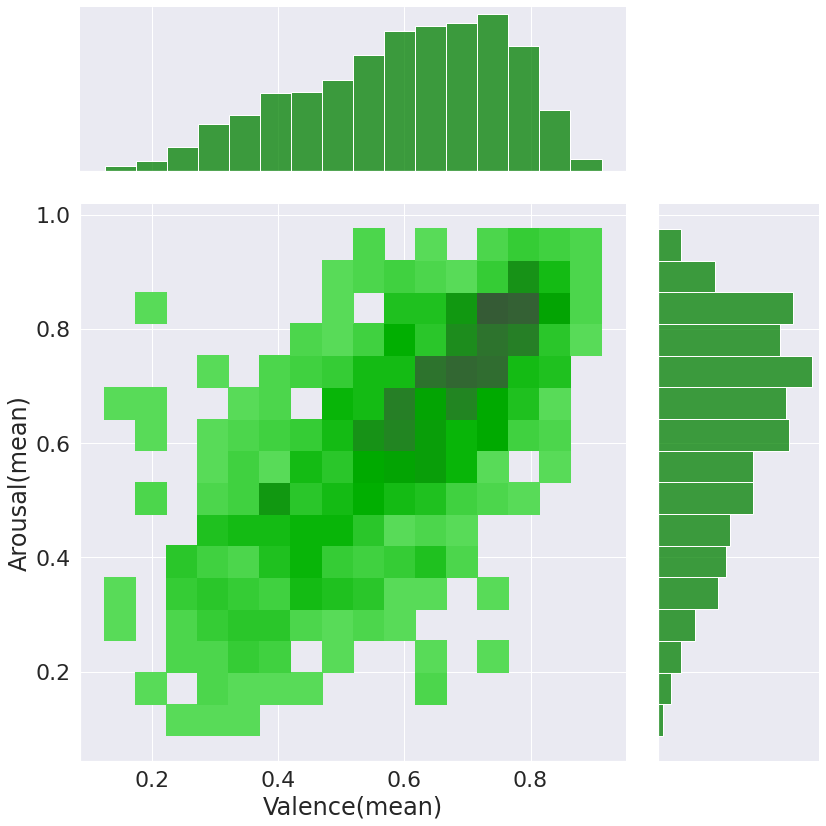

In [48]:
sns.set_theme(style='darkgrid',font_scale=2)
sns.color_palette(palette='rocket',as_cmap=True)
ax1 = sns.jointplot(x='Valence(mean)', y='Arousal(mean)', data=static_data, kind='hist', color='green', height=12, ratio=3)

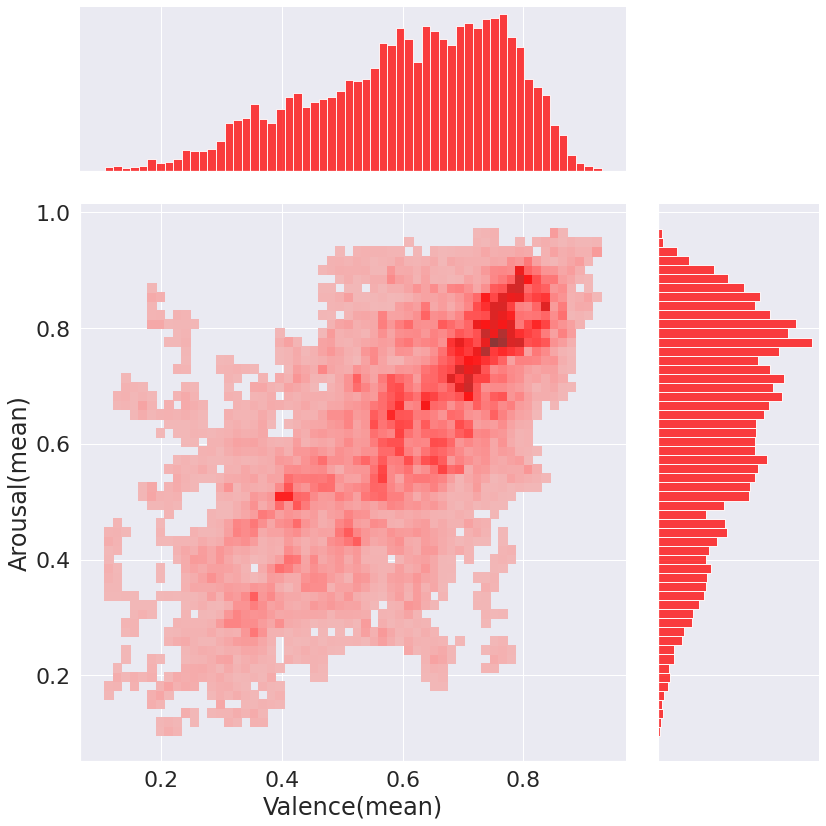

In [49]:
ax1 = sns.jointplot(x='Valence(mean)', y='Arousal(mean)', data=dynamic_data, kind='hist', color='red', height=12, ratio=3)

# Feature Selection by Statistical Methods

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

In [99]:
def select_features(X_train, y_train, X_test, score_func):
	fs = SelectKBest(score_func=score_func, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

## Static Feature Analysis
    
Number of Features: 6373

Number of Examples: 767

Test Split Size: 0.2

In [100]:
static_fs = pd.DataFrame(static_data.columns[1:-2],columns=['Names'])

### Arousal(mean)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(static_data[static_data.columns[1:-2]], static_data[static_data.columns[-2]], test_size=0.20, random_state=1)
print("Training Examples: ",y_train.shape[0])
print("Test Examples: ",y_test.shape[0])

Training Examples:  613
Test Examples:  154


In [102]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, score_func=f_regression)
static_fs['fs_arousal'] = fs.scores_

In [103]:
X_train_mfs, X_test_mfs, mfs = select_features(X_train, y_train, X_test, score_func=mutual_info_regression)
static_fs['mfs_arousal'] = mfs.scores_

### Valence(mean)


In [104]:
X_train, X_test, y_train, y_test = train_test_split(static_data[static_data.columns[1:-2]], static_data[static_data.columns[-1]], test_size=0.20, random_state=1)
print("Training Examples: ",y_train.shape[0])
print("Test Examples: ",y_test.shape[0])

Training Examples:  613
Test Examples:  154


In [105]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, score_func=f_regression)
static_fs['fs_valence'] = fs.scores_

In [106]:
X_train_mfs, X_test_mfs, mfs = select_features(X_train, y_train, X_test, score_func=mutual_info_regression)
static_fs['mfs_valence'] = mfs.scores_

## Dynamic Feature Analysis
    
Number of Features: 260

Number of Examples: 36434

Test Split Size: 0.05

In [107]:
dynamic_fs = pd.DataFrame(data=dynamic_data.columns[2:-2],columns=['Names'])

 ### Arousal(mean)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(dynamic_data[dynamic_data.columns[2:-2]], dynamic_data[dynamic_data.columns[-2]], test_size=0.05, random_state=1)
print("Training Examples: ",y_train.shape[0])
print("Test Examples: ",y_test.shape[0])

Training Examples:  34612
Test Examples:  1822


In [109]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, score_func=f_regression)
dynamic_fs['fs_arousal'] = fs.scores_

In [110]:
X_train_mfs, X_test_mfs, mfs = select_features(X_train, y_train, X_test, score_func=mutual_info_regression)
dynamic_fs['mfs_arousal'] = mfs.scores_

### Valence(mean)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(dynamic_data[dynamic_data.columns[2:-2]], dynamic_data[dynamic_data.columns[-1]], test_size=0.05, random_state=1)
print("Training Examples: ",y_train.shape[0])
print("Test Examples: ",y_test.shape[0])

Training Examples:  34612
Test Examples:  1822


In [112]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, score_func=f_regression)
dynamic_fs['fs_valence'] = fs.scores_

In [113]:
X_train_mfs, X_test_mfs, mfs = select_features(X_train, y_train, X_test, score_func=mutual_info_regression)
dynamic_fs['mfs_valence'] = mfs.scores_

## Feature Score Comparison

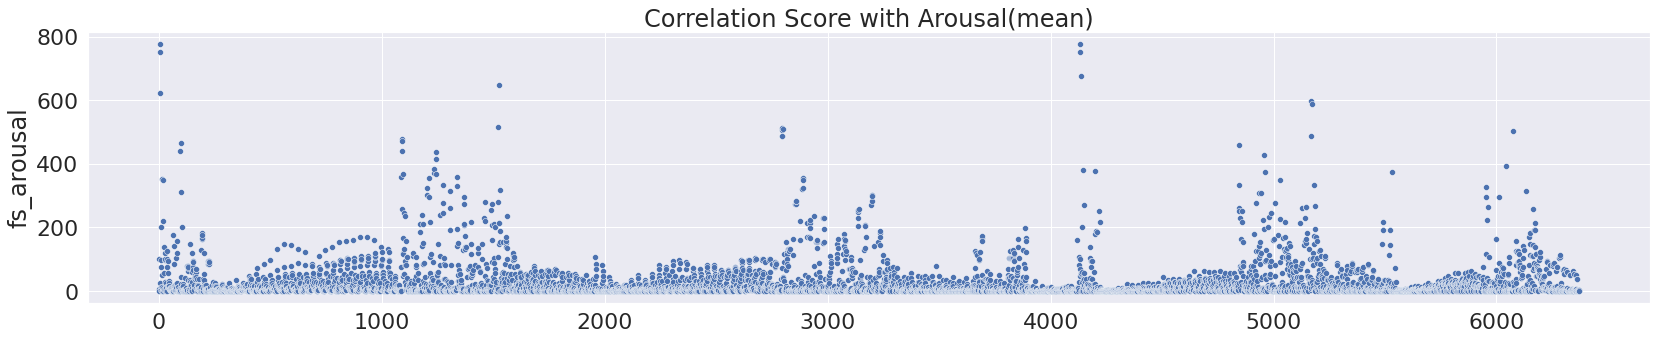

In [114]:
plt.figure(figsize=(28,5))
fig = sns.scatterplot(y=static_fs['fs_arousal'],x=range(len(static_fs)))
fig = plt.title("Correlation Score with Arousal(mean)")

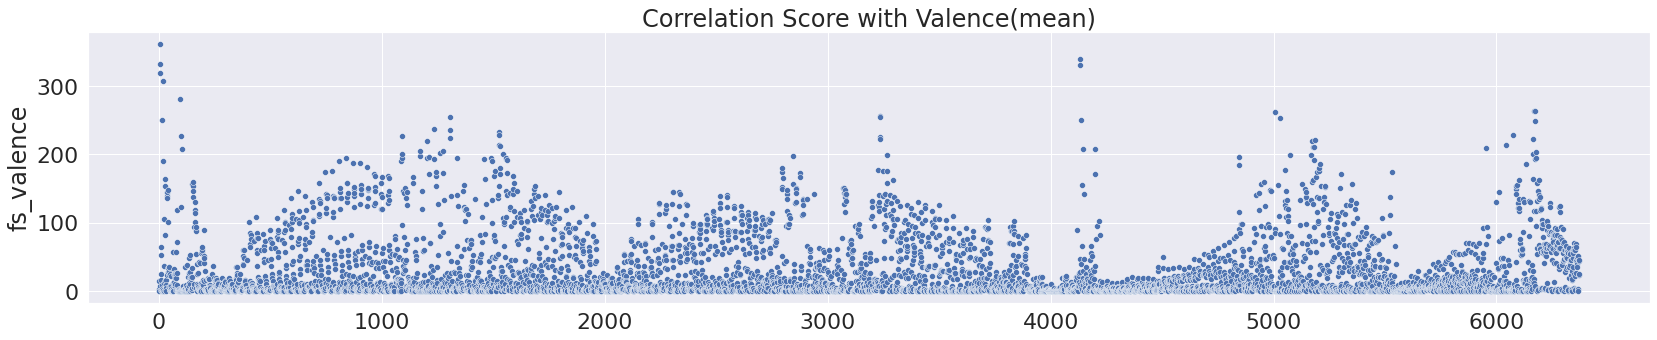

In [115]:
plt.figure(figsize=(28,5))
fig = sns.scatterplot(y=static_fs['fs_valence'],x=range(len(static_fs)))
fig = plt.title("Correlation Score with Valence(mean)")

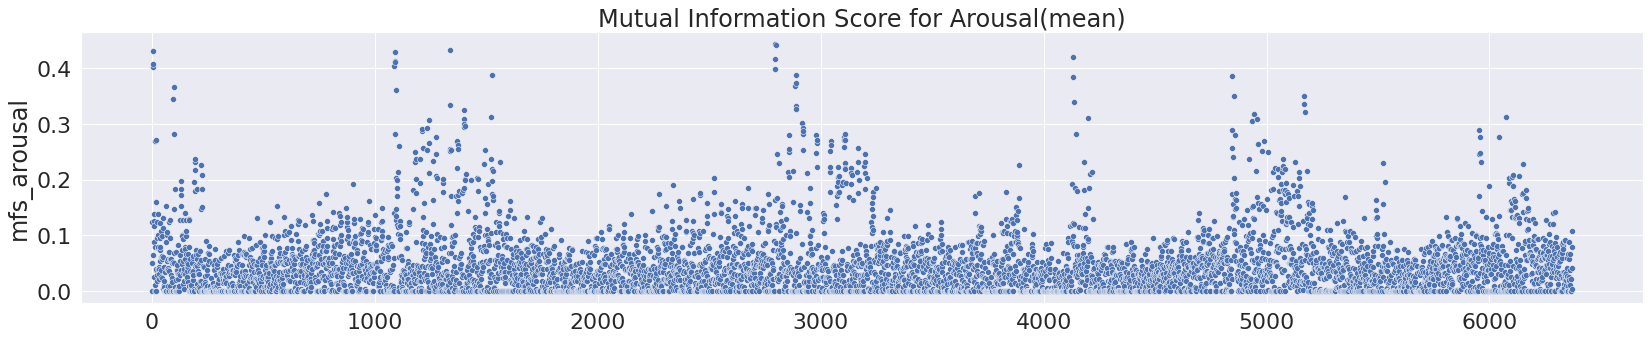

In [116]:
plt.figure(figsize=(28,5))
fig = sns.scatterplot(y=static_fs['mfs_arousal'],x=range(len(static_fs)))
fig = plt.title("Mutual Information Score for Arousal(mean)")

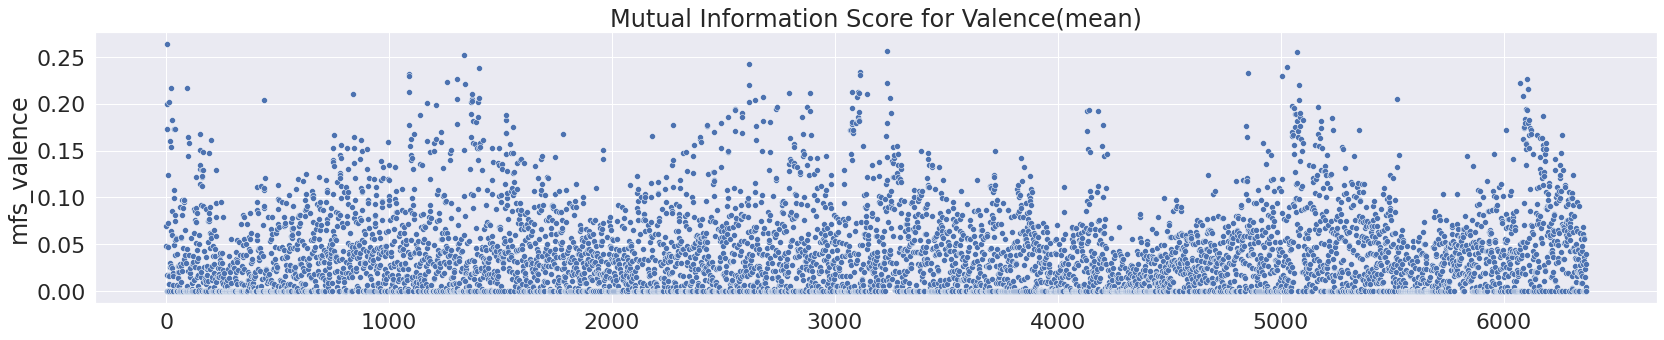

In [117]:
plt.figure(figsize=(28,5))
fig = sns.scatterplot(y=static_fs['mfs_valence'],x=range(len(static_fs)))
fig = plt.title("Mutual Information Score for Valence(mean)")

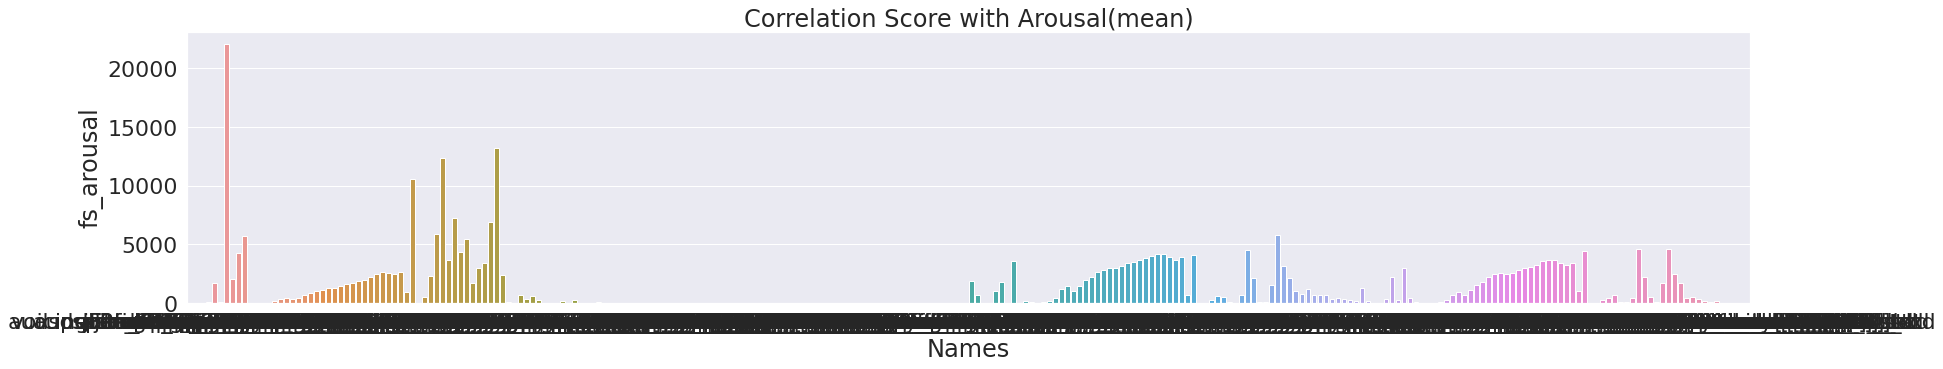

In [118]:
plt.figure(figsize=(28,5))
fig = sns.barplot(x='Names', y='fs_arousal', data=dynamic_fs)
fig = plt.title("Correlation Score with Arousal(mean)")

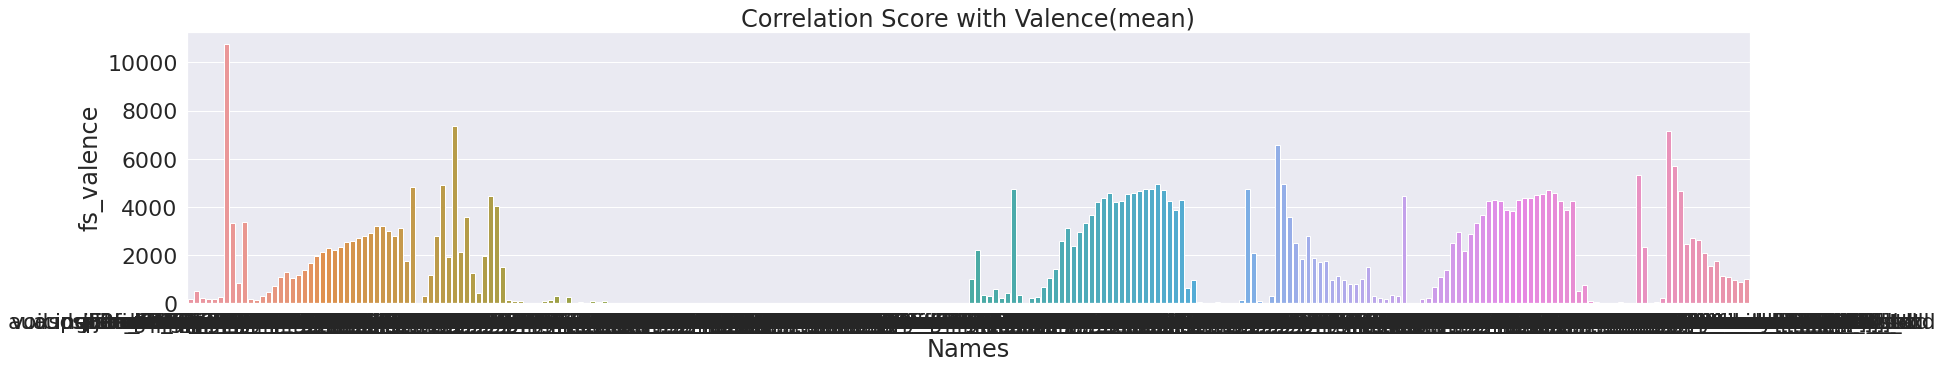

In [119]:
plt.figure(figsize=(28,5))
fig = sns.barplot(x='Names', y='fs_valence', data=dynamic_fs)
fig = plt.title("Correlation Score with Valence(mean)")

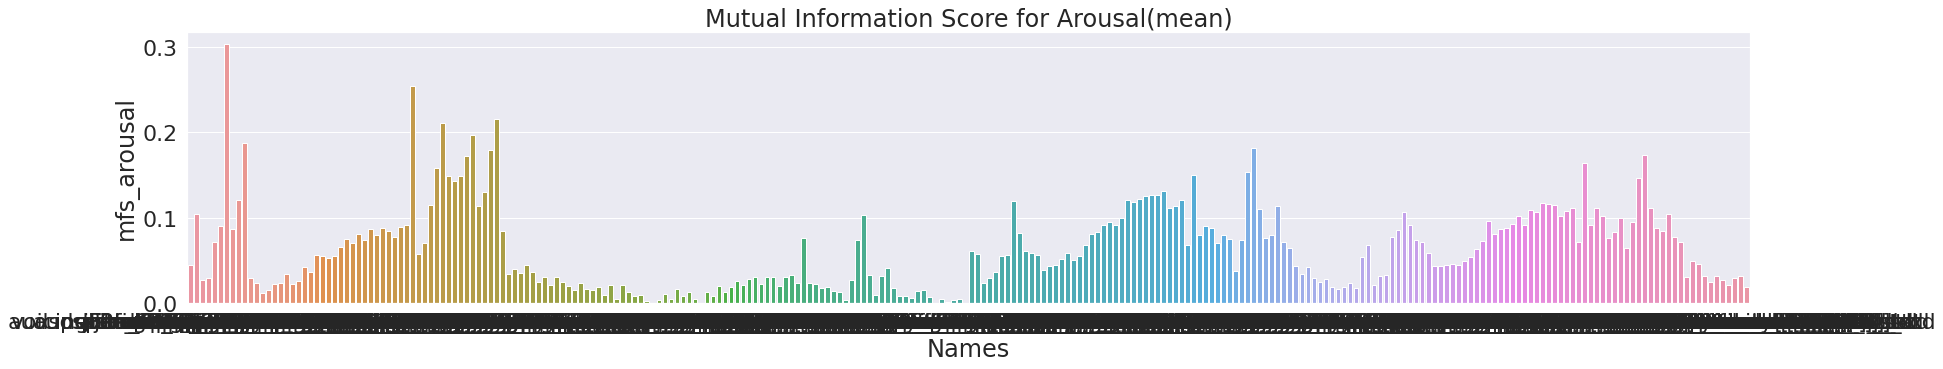

In [120]:
plt.figure(figsize=(28,5))
fig = sns.barplot(x='Names', y='mfs_arousal', data=dynamic_fs)
fig = plt.title("Mutual Information Score for Arousal(mean)")

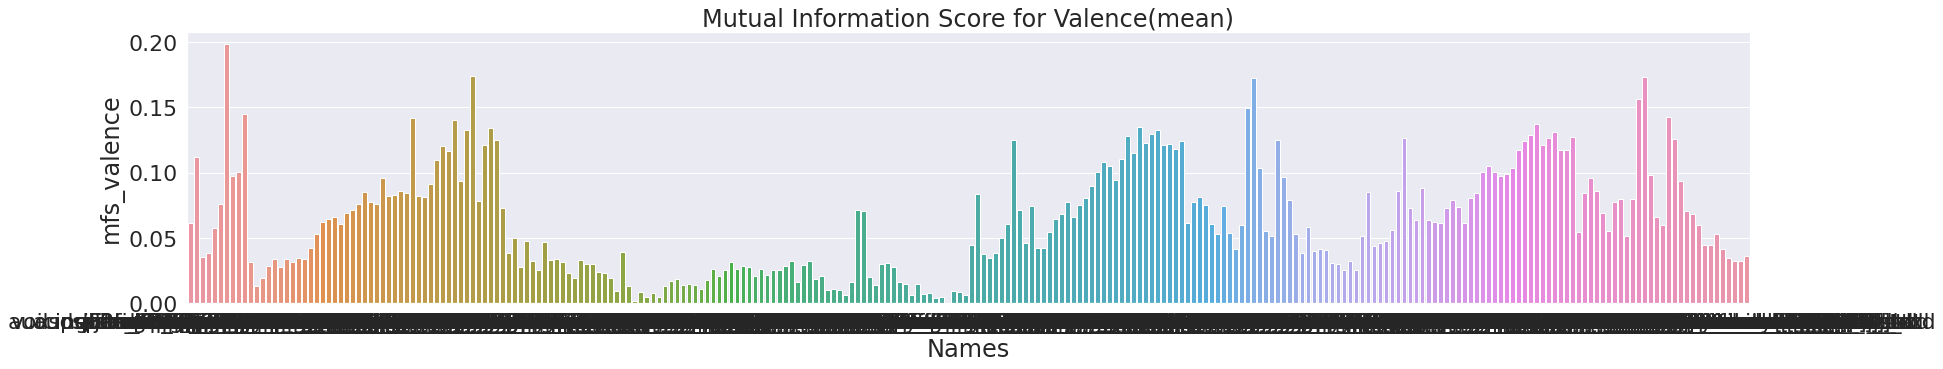

In [121]:
plt.figure(figsize=(28,5))
fig = sns.barplot(x='Names', y='mfs_valence', data=dynamic_fs)
fig = plt.title("Mutual Information Score for Valence(mean)")